# References

- Trustworthy Machine Learning Lecture at the University of Tübingen. 
Winter Semester 2023/2024. https://www.youtube.com/playlist?list=PL05umP7R6ij0FDHxle4CQLkzOfN-PAt7b ***
- Mucsányi B, Kirchhof M, Nguyen E, Rubinstein A, Oh SJ. Trustworthy Machine Learning 2023. ***
- Guo C, Pleiss G, Sun Y, Weinberger KQ. On Calibration of Modern Neural Networks 2017. 
- Gawlikowski J, Tassi CRN, Ali M, Lee J, Humt M, Feng J, et al. A survey of uncertainty in deep neural networks. Artif Intell Rev 2023;56:1513–89. ***
- Hüllermeier E, Waegeman W. Aleatoric and epistemic uncertainty in machine learning: an introduction to concepts and methods. Mach Learn 2021;110:457–506. ***
- Huang L, Ruan S, Xing Y, Feng M. A review of uncertainty quantification in medical image analysis: Probabilistic and non-probabilistic methods. Medical Image Analysis 2024;97:103223. ***
- Angelopoulos AN, Kohli AP, Bates S, Jordan MI, Malik J, Alshaabi T, et al. Image-to-Image Regression with Distribution-Free Uncertainty Quantification and Applications in Imaging 2022.




# Trustworthy AI 2: Uncertainty quantification

Definition: Uncertainty Quantification (UQ) is the process of quantifying the level of confidence in a model’s predictions. It helps identify how sure or unsure the model is about its outputs.

**Key Learning Objectives:**

- Understand the role of UQ in building trustworthy AI.
- Differentiate between types of uncertainty and their implications.
- Explore techniques for measuring and handling uncertainty.

## Outline
- Introduction
- Predictive uncertainty
- Epistemic uncertainty
    - Ensemble
    - Bayesian neural network
- Aleatoric uncertainty
    - loss function: Gaussian loss, pinball loss
    - Calibration
    - Test-time augmentation
- Other methods
    - Gaussian process
    - Conformal prediction
- Uncertainty evaluation
- Application in medicine


# Introduction

## Why Uncertainty quantification

![](images_uq/intro.png)

- Human-in-the-Loop Decision Making

    - Goal: Efficiently allocate human resources by only requiring human intervention when the model’s confidence is low.
    - Mechanism: The model indicates uncertainty by saying, “I am not sure about the result.” In these cases, human experts can step in, assess the situation, and adjust the prediction if necessary.

- Risk Management and Safety

    - Goal: Minimize risks by ensuring the model only acts when confident.
    - Mechanism: If the model is unsure, the system can halt processing or switch to a safe fallback state to avoid potential errors.
    - Example: In a learning-based manufacturing robot for car assembly, if the robot is uncertain about its next action, it may pause or escalate to a safer state. Acting with uncertainty could lead to costly mistakes, including damaging the product.

## Example use cases

#### Example: Image search for disease

![](images_uq/intro2.png)

ref: https://blog.google/technology/health/ai-dermatology-preview-io-2021/

An image search tool for skin disease detection that flags cases with high uncertainty for physician consultation.

#### Example: Active learning

![](images_uq/intro3.png)

ref: Active Learning Literature Survey, Settles 2010

In active learning, the model identifies instances it is uncertain about and prioritizes them for labeling, reducing the need for extensive labeled datasets.

ref: https://www.gatsby.ucl.ac.uk/~balaji/balaji-uncertainty-talk-cifar-dlrl.pdf

#### Object detection pipeline

![](images_uq/intro4.png)

- Object detection pipelines, such as in Faster R-CNN, use “objectness” scores to quantify confidence for each detected object.
- The model proposes bounding boxes and provides a confidence score for each. This score helps prune unlikely boxes, improving both accuracy and efficiency.

## Example of Uncertainty



![](images_uq/uq_ex1.png)

- f(x) is output
- c(x) is probability that f(x) is correct (0 <= c(x) <= 1)

![](images_uq/uq_ex2.png)

face recognition

- c(x) can be vector of confident

![](images_uq/uq_ex3.png)

A. N. Angelopoulos et al., “Image-to-image regression with distribution-free uncertainty quantification and applications in imaging,” PMLR, https://proceedings.mlr.press/v162/angelopoulos22a.html . 

- uncertainty also can quantify as a set of value (set of possible value of image in this case)

![](images_uq/uq_ex4.png)

- uncertainty also can quantify as a set of value



### Binary Classification Task

- Given an input 𝑥, the model produces an output 𝑓(𝑥), which represents the predicted probability that 𝑥 belongs to the positive class. 
- Typically, a cut-off point of 0.5 is used.
- If 𝑓(𝑥)>0.5, classify as Positive (Class 1).

In this case, we may define confidence $c(x)$ as $max(f(x), 1-f(x))$ and uncertainty as $1- c(x)$.

![](images_uq/cx.png)



# Predictive uncertainty model

As a modeller, one is mainly interested in the uncertainty that is propagated onto a prediction $\hat{y}$ , the so-called predictive uncertainty. Within the data acquisition model, the probability distribution for a prediction $\hat{y}$ based on some sample $x$ is given by

$$p(y|x, D) = \int p(y|x, \theta) p(\theta | D) d \theta $$

1. Epistemic uncertainty
    - “I am not sure because I have not seen it before.” 
    - Model uncertainty
2. Aleatoric uncertainty
    - “I have experienced it before, I know what I am doing, but I think there is more than one good answer to your question, so I cannot choose just one.”
    - Data uncertainty

![](images_uq/epis.png)

Yang, CI., Li, YP. Explainable uncertainty quantifications for deep learning-based molecular property prediction. J Cheminform 15, 13 (2023). https://doi.org/10.1186/s13321-023-00682-3

![](images_uq/vs.png)

Alex Kendall and Yarin Gal. What Uncertainties Do We Need in Bayesian Deep Learning for Computer Vision? 2017. doi: 10.48550/ARXIV.1703.04977. url: https://arxiv.org/abs/1703.04977.

## Epistemic uncertainty

- “I am not sure because I have not seen it before.” 
- Model uncertainty

![](images_uq/epis2.png) ![](images_uq/epis3.png)

$$p(y|x, D) = \int p(y|x, \theta) p(\theta | D) d \theta $$

$$p(\theta | D) \propto p(\theta )p(D|\theta)$$

- There are several possible classifiers compatible with the data we have observed (we are unsure about our prediction because several models could fit the training data).
- We wish to sample data from underexplored regions to increase our certainty in the choice of the model.

**Prior Hypothesis space $p(\theta)$**

![](images_uq/epis_prior.png)

Epistemic uncertainty cause by

1. The size of our training set is too small, and so the variance of our estimator is too high. 
2. The training data distribution does not cover some meaningful regions in the input space; there are some underexplored areas eg Out of distribution, distribution shift.

Note: Epistemic uncertainty is reducible. It stems from limitations in current knowledge and can be mitigated through data collection or model improvement.

#### Example: Distribution shift

![](images_uq/epis_ex.png)

## Aleatoric uncertainty

- “I have experienced it before, I know what I am doing, but I think there is more than one good answer to your question, so I cannot choose just one.”
- Data uncertainty

![](images_uq/alea.png)

Battleday et al. 2019 “Improving machine classification using human uncertainty measurements” https://openreview.net/pdf?id=rJl8BhRqF7

Aleatoric uncertainty, also known as data uncertainty, arises from information loss or noise in the data itself. Unlike epistemic uncertainty, which can be reduced by improving the model or adding more data, aleatoric uncertainty is irreducible—it represents uncertainty that is intrinsic to the data and cannot be eliminated through model adjustments.

![](images_uq/alea2.png)

Vaishaal Shankar, Rebecca Roelofs, Horia Mania, Alex Fang, Benjamin Recht, and Ludwig Schmidt. 2020. Evaluating machine accuracy on ImageNet. In Proceedings of the 37th International Conference on Machine Learning (ICML'20), Vol. 119. JMLR.org, Article 801, 8634–8644.

In image there are many object such as screen and coffee mug. Model may learn the association between object and cannot sure whather the correct answer is.

![](images_uq/alea3.png)

Vaishaal Shankar, Rebecca Roelofs, Horia Mania, Alex Fang, Benjamin Recht, and Ludwig Schmidt. 2020. Evaluating machine accuracy on ImageNet. In Proceedings of the 37th International Conference on Machine Learning (ICML'20), Vol. 119. JMLR.org, Article 801, 8634–8644.

You not sure whether it is Rabbit or Duck

![](images_uq/alea4.png)

Battleday et al. 2019 “Improving machine classification using human uncertainty measurements” https://openreview.net/pdf?id=rJl8BhRqF7

Missing features can introduce overlaps in two classes. When we have both features x1 and x2, points of the same label are well separated. For example, we know all the pixels in the N-digit MNIST example. We have no aleatoric uncertainty. As soon as we remove some features (e.g., a part of the image), we have overlaps between the classes.

![](images_uq/alea5.png)

An Y, Lam HK, Ling SH. Auto-Denoising for EEG Signals Using Generative Adversarial Network. Sensors. 2022; 22(5):1750. https://doi.org/10.3390/s22051750 

EEG sensor noise.



## Epistemic vs Aleatoric uncertainty

![](images_uq/alea_epis.png)

Hüllermeier E, Waegeman W. Aleatoric and epistemic uncertainty in machine learning: an introduction to concepts and methods. Mach Learn 2021;110:457–506.


![](images_uq/alea_epis2.png)

Gawlikowski J, Tassi CRN, Ali M, Lee J, Humt M, Feng J, et al. A survey of uncertainty in deep neural networks. Artif Intell Rev 2023;56:1513–89.

### Source of uncertainty in practice

1. the data: The occurrence of some information in the environment (e.g. a bird’s singing) and a measured observation of this information (e.g. an audio record). 
    - the variability in real world situations eg. out of distribution (Epistemic)
    - the errors inherent to the measurement systems (Aleatoric)
    - unknown data (Epistemic)
2. the DNN building process: The design and training of a neural network. (Epistemic)
    - Model architecture (Epistemic)
    - Model training process (Epistemic)

#### Uncertainty quantification methods

![uq_overview.png](images_uq/uq_overview.png)

Hüllermeier E, Waegeman W. Aleatoric and epistemic uncertainty in machine learning: an introduction to concepts and methods. Mach Learn 2021;110:457–506.

# Epistemic Uncertainty Quantification

Epistemic uncertainty represents uncertainty due to a lack of knowledge about the optimal model. It can be quantified using these idea:

1. Modeling Parameter Distributions: Estimating uncertainty in model parameters.
2. Out-of-Distribution (OOD) Detection: Assessing if data samples are dissimilar to the training set, often using distance metrics or anomaly detection techniques.

## Emsemble learning (4.5)

In model ensembling, we train several deterministic models on the same (or subsampled) data simultaneously. We approximate $p(\theta | D)$ as ensemble of $M$ models.

$$p(\theta | D) \approx \frac{1}{M} \sum_{m=1}^M \delta(\theta - \theta^{m})$$

Then

$$\begin{split}
p(y|x, D) =& \int p(y|x, \theta) p(\theta | D) d \theta \\
\approx & \int p(y|x, \theta) \frac{1}{M} \sum_{m=1}^M \delta(\theta - \theta^{m}) d \theta \\
= & \sum_{m=1}^M\int p(y|x, \theta) \frac{1}{M} \delta(\theta - \theta^{m}) d \theta \\
= & \frac{1}{M}\sum_{m=1}^M p(y|x, \theta^{m})
\end{split}$$

This corresponds to averaging the predictions of individual models.

Pro:
- Conceptually simple – run the training algorithm M times and average outputs.
- Applicable to a wide range of models – from linear regression to ChatGPT.
- Parallelizable – if we have a lot of computational resources, we can train multiple models simultaneously on different cluster nodes (GPUs)
- Performant – ensembles are not only able to represent epistemic uncertainty but are also often more accurate.

Contra:
- Ensembles do not realize the full potential of Bayesian ML (no infinite number of models, no connectivity between the models).
- Space and time complexities scale linearly with M . If we have a limited number of GPUs, we must wait until the previous model finishes training

## Baysian methods (4.5)

### MC dropout

Dropout, commonly used as a regularization technique, also serves as a form of Bayesian approximation when used during both training and testing phases. In this approach, we can interpret dropout as an approximation to a probabilistic model by drawing multiple "sampled" models through random network weight adjustments. This aligns with the Bayesian framework where dropout effectively **simulates an ensemble of models**.

At inference time, we can apply dropout in a way similar to model ensembling by performing multiple stochastic forward passes. The predictive distribution of the output 𝑦 given input 𝑥 and data 𝐷 is approximated as:

$$\begin{split}
p(y|x, D) =& \int p(y|x, \theta) p(\theta | D) d \theta \\
\approx& \frac{1}{K}\sum_{m=1}^K p(y|x, \theta^{k})
\end{split}$$

For $K$ is the number of times we run (samples) the models.


![](images_uq/mcdrop.png)

Balaji Lakshminarayanan, Alexander Pritzel, and Charles Blundell. Simple and Scalable Predictive Uncertainty Estimation using Deep Ensembles. 2016. url: https://arxiv.org/abs/1612.01474.

These days, MC dropout is treated as a method that does not really work.

### Variational inference

![](images_uq/bayes.png)

In variational inference, we assume that the posterior distribution of model parameters can be approximated by a simpler distribution, such as a Gaussian distribution

![](images_uq/var.png)

$$p(\theta | D) \sim \mathcal{N}(\theta| \mu,\sigma)$$

then

$$\begin{split}
p(y|x, D) =& \int p(y|x, \theta) p(\theta | D) d \theta \\
\approx & \int p(y|x, \theta)  \mathcal{N}(\theta| \mu,\sigma) d \theta \\
\approx& \frac{1}{K}\sum_{m=1}^K p(y|x, \theta^{k})
\end{split}$$

Similar to what we do in MCDropout, we can sample $\theta$ from normal distribution (approximate distribution).

# Aleatoric uncertainty quantification

To represent aleatoric uncertainty, we rely on two key components in our model design:

1. Model Architecture: Formulate a model architecture that accommodates multiple possible outputs. We should prepare, e.g., a probabilistic output where our model outputs the parameters of this output distribution rather than a single prediction.
- Example (Regression): Instead of predicting y, the model predicts the mean (μ) and standard deviation (σ) of a Gaussian distribution: p(y|x) = N(μ(x), σ(x)). The σ(x) represents the aleatoric uncertainty. Higher σ means more uncertainty.

2. Loss Function: Use a loss function that aligns the predicted output distribution with the observed data distribution. For example, in regression tasks, a negative log-likelihood loss can be used to train the model to fit the predicted distribution to the data, where higher predicted variance is encouraged for noisier data points. This approach ensures the model’s uncertainty estimates are consistent with the data variability.
- Example (Classification): Cross-entropy is the standard loss. It encourages the model to assign high probability to the correct class, but the spread of probabilities across classes also reflects uncertainty.


## Loss function (4.1)

Loss functions guide the model to make predictions that represent probability distributions over classes. A commonly used loss function in classification tasks is the Negative Log-Likelihood (NLL), or equivalently, cross-entropy loss:

$$L = -\sum_k y_k \log(f_k(x))$$

where $f_k(x)$ is the predicted probability for class 𝑘, and $y_k$ is the true label, often represented as a one-hot encoded vector.

- DNN is encouraged to predict $f_k(X)$ that correctly represents the spread $p(Y|X)$ in the training set.
- The popular softmax + cross-entropy design is already capable of handling aleatoric uncertainty!

### Gaussian loss

$$ p(y | x; \mu(x), \sigma(x)) = \frac{1}{\sqrt{2\pi\sigma(x)^2}} \exp\left(-\frac{(y - \mu(x))^2}{2\sigma(x)^2}\right) $$


NLL loss

$$ \text{NLL} = -\sum_i \log(p(y_i | x_i; \mu(x_i), \sigma(x_i))) $$

$$ \text{NLL} = -\sum_i \left[ \log(1) - \log(\sqrt{2\pi\sigma(x_i)^2}) - \frac{(y_i - \mu(x_i))^2}{2\sigma(x_i)^2} \right]$$

$$ \text{NLL} = \sum_i \left[ \log(\sqrt{2\pi\sigma(x_i)^2}) + \frac{(y_i - \mu(x_i))^2}{2\sigma(x_i)^2} \right]$$

$$ \text{NLL} = \sum_i \left[ 0.5 * \log(2\pi\sigma(x_i)^2) + 0.5 * \frac{(y_i - \mu(x_i))^2}{\sigma(x_i)^2} \right]$$

loss for single data point

$$
 L = 0.5 * log(2πσ(x)^2) + 0.5 * (y - μ(x))^2 / σ(x)^2
$$

Interpretation: The NLL loss has two key components:

- $log(2πσ(x_i)^2)$: This term penalizes high predicted variance. The model is encouraged to be as certain as possible.
- $(y_i - μ(x_i))^2 / σ(x_i)^2$: This term penalizes the squared error, but normalized by the predicted variance. If the model predicts high variance (high uncertainty), the penalty for a large error is reduced. If the model predicts low variance (high certainty), it is heavily penalized for errors. This is crucial for capturing aleatoric uncertainty: the model learns to predict higher variance for data points that are inherently noisier.

e:\dream\miniconda3\envs\ds\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Epoch [50/500], Loss: 1.8504
Epoch [100/500], Loss: 1.6111
Epoch [150/500], Loss: 1.5827
Epoch [200/500], Loss: 1.5665
Epoch [250/500], Loss: 1.5506
Epoch [300/500], Loss: 1.5436
Epoch [350/500], Loss: 1.5382
Epoch [400/500], Loss: 1.5325
Epoch [450/500], Loss: 1.5257
Epoch [500/500], Loss: 1.5175


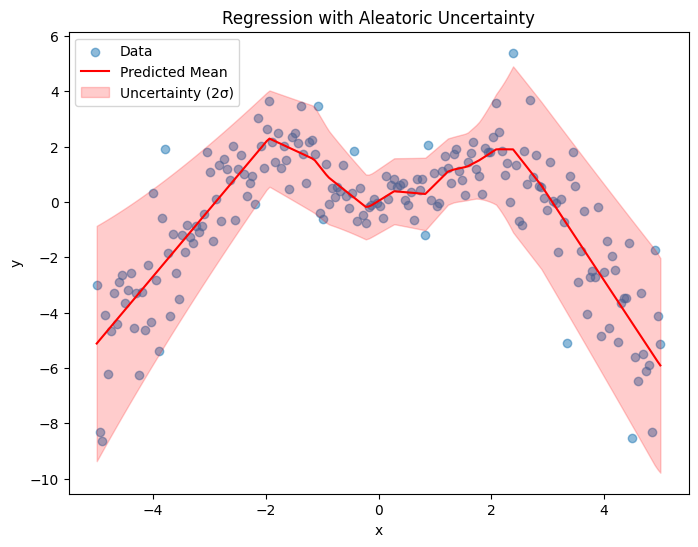

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# --- Toy Data ---
num_samples = 200
X = torch.linspace(-5, 5, num_samples).reshape(-1, 1)
# Target function with heteroscedastic noise (noise varies with x)
true_mean = X * torch.sin(X)
true_std = 0.5 + torch.abs(X) * 0.3  # Increasing std dev with |x|
y = true_mean + torch.randn(num_samples, 1) * true_std


# --- Model (Predicts mean and log-variance) ---
class RegressionNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_mean = nn.Linear(hidden_dim, 1)
        self.fc_logvar = nn.Linear(hidden_dim, 1)  # Predict log-variance
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        mean = self.fc_mean(x)
        logvar = self.fc_logvar(x)  # Output log-variance
        return mean, logvar

model = RegressionNN(input_dim=1, hidden_dim=20)

# --- Loss Function (NLL for Gaussian) ---
def gaussian_nll_loss(y_true, y_pred_mean, y_pred_logvar):
    y_pred_std = torch.exp(0.5 * y_pred_logvar)  # Convert logvar to std
    loss = 0.5 * torch.log(2 * np.pi * (y_pred_std**2)) + 0.5 * ((y_true - y_pred_mean) / y_pred_std)**2
    return torch.mean(loss)

# --- Optimizer ---
optimizer = optim.Adam(model.parameters(), lr=0.01)

# --- Training Loop ---
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    mean, logvar = model(X)
    loss = gaussian_nll_loss(y, mean, logvar)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# --- Prediction and Uncertainty Visualization ---
with torch.no_grad():
    predicted_mean, predicted_logvar = model(X)
    predicted_std = torch.exp(0.5 * predicted_logvar)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X.numpy(), y.numpy(), label='Data', alpha=0.5)
plt.plot(X.numpy(), predicted_mean.numpy(), label='Predicted Mean', color='red')
plt.fill_between(X.numpy().flatten(),
                 (predicted_mean - 2 * predicted_std).numpy().flatten(),
                 (predicted_mean + 2 * predicted_std).numpy().flatten(),
                 color='red', alpha=0.2, label='Uncertainty (2σ)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression with Aleatoric Uncertainty')
plt.show()

### Quantile Loss (Pinball Loss)

The key to quantile regression is the quantile loss function (also known as the pinball loss):

$$
L_τ(y, \hat{y}) =
\begin{cases}
(y - \hat{y}) * τ      \  & \text{if} \ y >= \hat{y} \\
(\hat{y} - y) * (1 - τ) \ & \text{if} \ y < \hat{y}
\end{cases}
$$

where:

- τ (tau) is the target quantile (e.g., 0.1, 0.5, 0.9). It's a fixed value between 0 and 1.
- y is the true value.
- $\hat{y}$ is the predicted quantile.

How it Works

- Asymmetric Penalty: The pinball loss applies an asymmetric penalty depending on whether the prediction is above or below the true value. This asymmetry is what allows it to target specific quantiles.
- Example (τ = 0.9): If we're predicting the 90th percentile (τ = 0.9), the loss penalizes underestimation (y > y_hat) much more heavily (0.9 * error) than overestimation (0.1 * error). This pushes the model to predict a value that is higher than most of the true values.
- Multiple Quantiles: To get a full picture of the distribution, you train separate models (or a single model with multiple outputs) for different values of τ (eg. for quantiles 0.1, 0.5, and 0.9).

Training model for quantile: 0.1
Tau: 0.1, Epoch [100/1000], Loss: 0.2854
Tau: 0.1, Epoch [200/1000], Loss: 0.2351
Tau: 0.1, Epoch [300/1000], Loss: 0.2217
Tau: 0.1, Epoch [400/1000], Loss: 0.2173
Tau: 0.1, Epoch [500/1000], Loss: 0.2141
Tau: 0.1, Epoch [600/1000], Loss: 0.2114
Tau: 0.1, Epoch [700/1000], Loss: 0.2060
Tau: 0.1, Epoch [800/1000], Loss: 0.1999
Tau: 0.1, Epoch [900/1000], Loss: 0.1976
Tau: 0.1, Epoch [1000/1000], Loss: 0.1944
Training model for quantile: 0.5
Tau: 0.5, Epoch [100/1000], Loss: 0.4794
Tau: 0.5, Epoch [200/1000], Loss: 0.4753
Tau: 0.5, Epoch [300/1000], Loss: 0.4740
Tau: 0.5, Epoch [400/1000], Loss: 0.4690
Tau: 0.5, Epoch [500/1000], Loss: 0.4652
Tau: 0.5, Epoch [600/1000], Loss: 0.4620
Tau: 0.5, Epoch [700/1000], Loss: 0.4611
Tau: 0.5, Epoch [800/1000], Loss: 0.4622
Tau: 0.5, Epoch [900/1000], Loss: 0.4593
Tau: 0.5, Epoch [1000/1000], Loss: 0.4574
Training model for quantile: 0.9
Tau: 0.9, Epoch [100/1000], Loss: 0.2701
Tau: 0.9, Epoch [200/1000], Loss: 0.24

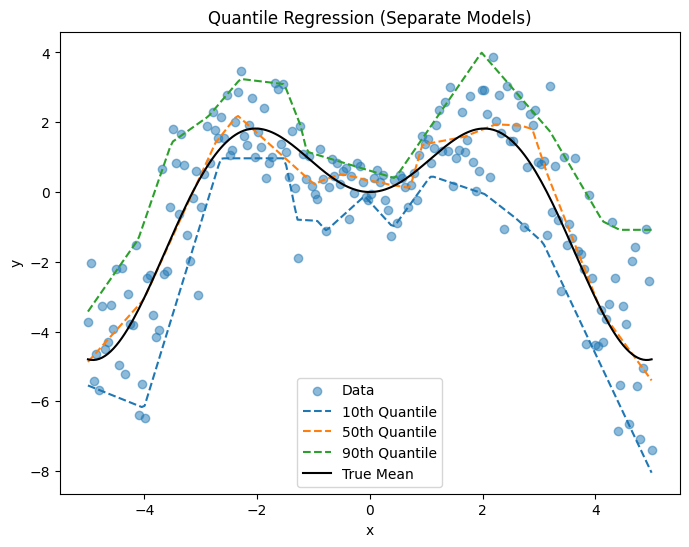

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# --- Toy Data ---
num_samples = 200
X = torch.linspace(-5, 5, num_samples).reshape(-1, 1)
true_mean = X * torch.sin(X)
true_std = 0.5 + torch.abs(X) * 0.3
y = true_mean + torch.randn(num_samples, 1) * true_std

# --- Model (Predicts a single quantile) ---
class SingleQuantileRegressionNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, 1)  # Output layer for a single quantile
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        quantile = self.fc_out(x)  # Predict a single quantile
        return quantile

# --- Quantile Loss (Pinball Loss) ---
def single_quantile_loss(y_true, y_pred, tau):
    """
    Calculates the pinball loss for a single quantile.

    Args:
        y_true: Tensor of true values.
        y_pred: Tensor of predicted quantile.
        tau: The target quantile (float between 0 and 1).

    Returns:
        Pinball loss, averaged over all observations.
    """
    error = y_true - y_pred
    loss = torch.where(error >= 0, tau * error, (tau - 1) * error)
    return torch.mean(loss)

# --- Training Function ---
def train_quantile_model(X, y, tau, num_epochs=1000, lr=0.01, hidden_dim=20):
    """Trains a single quantile regression model."""

    model = SingleQuantileRegressionNN(input_dim=X.shape[1], hidden_dim=hidden_dim)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X)
        loss = single_quantile_loss(y, y_pred, tau)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Tau: {tau}, Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model

# --- Define Quantiles and Train Models ---
quantiles = [0.1, 0.5, 0.9]
models = {}  # Dictionary to store trained models
for tau in quantiles:
    print(f"Training model for quantile: {tau}")
    models[tau] = train_quantile_model(X, y, tau)

# --- Prediction and Visualization ---
with torch.no_grad():
    predicted_quantiles = {}
    for tau, model in models.items():
        predicted_quantiles[tau] = model(X)

plt.figure(figsize=(8, 6))
plt.scatter(X.numpy(), y.numpy(), label='Data', alpha=0.5)

# Plot each predicted quantile
for tau, predicted_quantile in predicted_quantiles.items():
    plt.plot(X.numpy(), predicted_quantile.numpy(), label=f'{int(tau*100)}th Quantile', linestyle='--')

plt.plot(X.numpy(), true_mean.numpy(), label='True Mean', color='black', linestyle='-')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quantile Regression (Separate Models)')
plt.show()

## Calibration methods (4.1)

Even though a model outputs probabilities, these probabilities are often miscalibrated.  This means that a prediction of 90% confidence doesn't actually mean the model is correct 90% of the time.  Calibration techniques aim to fix this.

Calibration aims to adjust the predicted probabilities to make them more reliable. Techniques like temperature scaling, Platt scaling, and isotonic regression adjust the model outputs to produce well-calibrated probabilities. For example:

1. Temperature Scaling
2. Platt Scaling
3. Isotonic Regression

**Temperature scaling**

Temperature scaling is a simple but effective post-processing calibration technique. It involves dividing the logits (the raw output of the neural network before softmax) by a temperature parameter 𝑇 before applying the softmax function:

$$\text{softmax}(\frac{z}{T})$$

- T > 1 "softens" the probabilities (makes them less confident).
- T < 1 "sharpens" the probabilities (makes them more confident).

![](images_uq/temp.png)

Guo C, Pleiss G, Sun Y, Weinberger KQ. On Calibration of Modern Neural Networks 2017.

**Platt Scaling**

![](images_uq/platt.png)

https://en.wikipedia.org/wiki/Platt_scaling

In binary classification, Platt scaling fits a **logistic regression model** on the raw outputs (logits) to map them to calibrated probabilities. For multi-class problems, it can be extended by applying it to each class independently in a one-vs-rest manner.

**Isotonic Regression**

![](images_uq/iso.png)

https://en.wikipedia.org/wiki/Isotonic_regression

Isotonic regression finds a piecewise constant function that best fits the validation data. Unlike temperature and Platt scaling, it does not assume a specific functional form (non-parametric). This makes isotonic regression very flexible, as it allows for highly nonlinear mappings.

Using cpu device
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5955       0.6500        0.5547  0.0150
      2        0.5035       0.7583        0.4890  0.0140
      3        0.4402       0.7750        0.4502  0.0110
      4        0.4032       0.7833        0.4310  0.0100
      5        0.3843       0.8083        0.4214  0.0110
      6        0.3748       0.8167        0.4160  0.0100
      7        0.3700       0.8250        0.4118  0.0100
      8        0.3664       0.8250        0.4082  0.0090
      9        0.3627       0.8250        0.4045  0.0100
     10        0.3592       0.8250        0.4018  0.0090
     11        0.3562       0.8167        0.4000  0.0090
     12        0.3537       0.8167        0.3986  0.0100
     13        0.3515       0.8250        0.3977  0.0110
     14        0.3499       0.8250        0.3973  0.0110
     15        0.3484       0.8250        0.3972  0.0082
     16       

C:\Users\dream\AppData\Local\Temp\ipykernel_20700\589273018.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device) # Convert to tensors here
C:\Users\dream\AppData\Local\Temp\ipykernel_20700\589273018.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val = torch.tensor(y_val, dtype=torch.long).to(device)
C:\Users\dream\AppData\Local\Temp\ipykernel_20700\589273018.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32).to(device)  # Convert

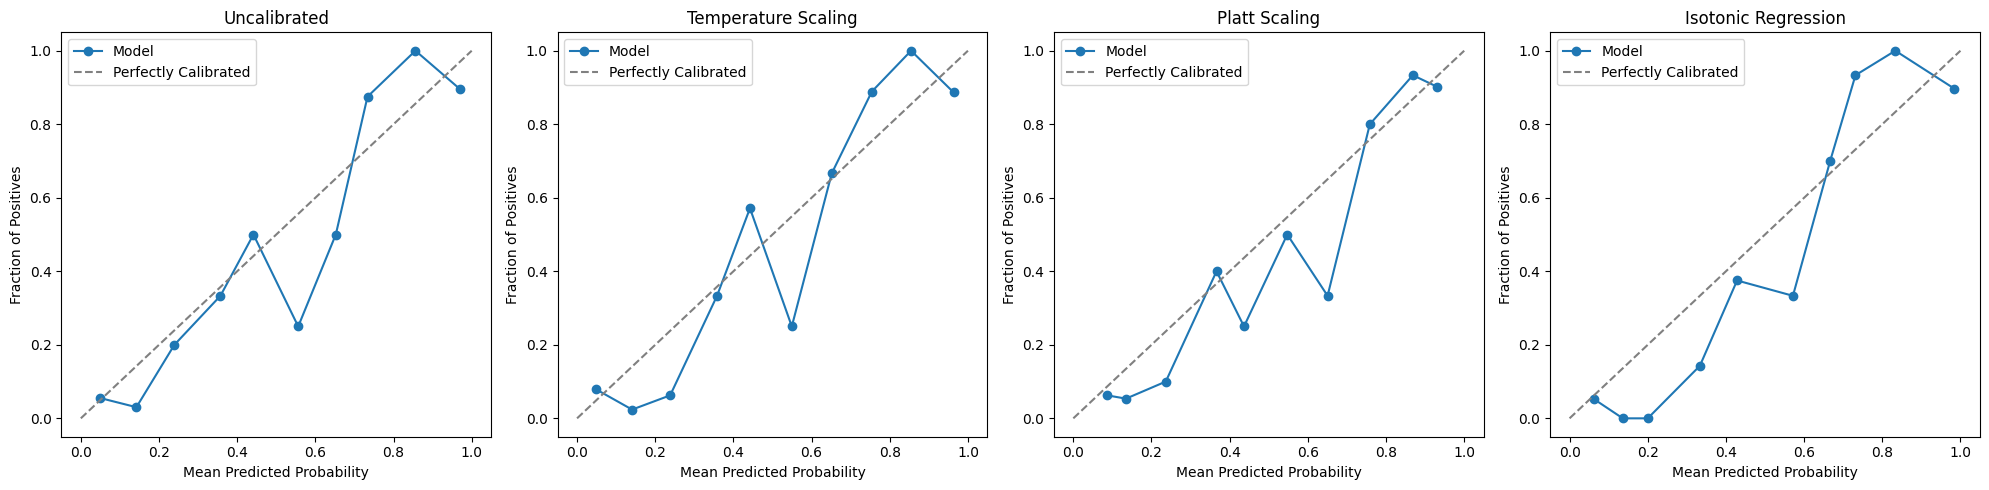

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin  # Import for creating a wrapper
from skorch import NeuralNetClassifier  # Import skorch's NeuralNetClassifier


# --- Toy Data Generation (Classification) ---
def generate_classification_data(n_samples=1000, n_features=2, n_classes=2, random_state=None):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,  # Number of informative features
        n_redundant=0,  # Number of redundant features
        n_classes=n_classes,
        random_state=random_state,
        flip_y=0.1,  # Add some label noise (aleatoric uncertainty)
        class_sep=1.0  # Separation between classes
    )
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

# --- Model Definition (Classification) ---
class ClassificationModel(nn.Module):
    def __init__(self, input_dim, n_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, 20)
        self.linear2 = nn.Linear(20, n_classes)  # Output logits for each class

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)  # No softmax here; CrossEntropyLoss applies it internally
        return x


# --- Training Loop (Now handled by Skorch) ---  No need for a separate training loop

# --- Calibration: Temperature Scaling ---
def calibrate_temperature(model, X_val, y_val, device="cpu"):
    """
    Finds the optimal temperature for temperature scaling (classification).
    """
    model.to(device)
    X_val = torch.tensor(X_val, dtype=torch.float32).to(device) # Convert to tensors here
    y_val = torch.tensor(y_val, dtype=torch.long).to(device)
    logits = []
    true_labels = []

    with torch.no_grad():
        for i in range(len(X_val)):
            output = model(X_val[i].unsqueeze(0))
            logits.append(output)
            true_labels.append(y_val[i].item())

    logits = torch.cat(logits)
    true_labels = torch.tensor(true_labels, dtype=torch.long, device=device)

    # Use CrossEntropyLoss to find the best temperature
    best_t = 1.0
    best_loss = float('inf')

    for t in np.linspace(0.1, 5, 100):  # Search over a range of temperatures
        scaled_logits = logits / t
        loss = nn.CrossEntropyLoss()(scaled_logits, true_labels)
        if loss < best_loss:
            best_loss = loss
            best_t = t

    print(f"Best Temperature: {best_t}")
    return best_t

def apply_temperature_scaling(model, X, temperature, device="cpu"):
    """Applies temperature scaling to the model's output (classification)."""
    model.to(device)
    X = torch.tensor(X, dtype=torch.float32).to(device)  # Convert X to a tensor
    with torch.no_grad():
        logits = model(X)
        scaled_logits = logits / temperature
        probs = torch.softmax(scaled_logits, dim=1)  # Apply softmax to get probabilities
    return probs.cpu().numpy() # Convert back to numpy for plotting


# --- Example Usage ---

# --- Device Configuration ---
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 1. Generate Data
n_classes = 2
X, y = generate_classification_data(n_samples=1000, n_features=2, n_classes=n_classes, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# 2. Train Model using Skorch
model = ClassificationModel(input_dim=X.shape[1], n_classes=n_classes)


net = NeuralNetClassifier(
    model,
    max_epochs=100,
    lr=0.01,
    criterion=nn.CrossEntropyLoss,  # Specify the loss function
    optimizer=optim.Adam,
    device=device,  # Pass the device to Skorch
    # Add more Skorch parameters as needed (e.g., batch_size, callbacks)
)

# Fit the Skorch model (handles training loop, device management, etc.)
net.fit(X_train, y_train)

# 3. Predict and Evaluate (Before Calibration)
probs_test = net.predict_proba(X_test)  # Skorch returns NumPy arrays
predicted_labels = np.argmax(probs_test, axis=1)
accuracy = (predicted_labels == y_test.numpy()).mean()
print(f"Accuracy (Before Calibration): {accuracy:.4f}")

# --- Calibration ---

# 4.1 Temperature Scaling
# Get the underlying PyTorch model from Skorch for temperature calibration
torch_model = net.module_
temperature = calibrate_temperature(torch_model, X_val, y_val, device=device)
probs_test_calibrated_temp = apply_temperature_scaling(torch_model, X_test, temperature, device=device)


# 4.2 Platt Scaling (using scikit-learn)
# Skorch models are already scikit-learn compatible, no wrapper needed
calibrator_platt = CalibratedClassifierCV(net, method='sigmoid', cv='prefit')
calibrator_platt.fit(X_val, y_val)  # Fit on the validation set
probs_test_calibrated_platt = calibrator_platt.predict_proba(X_test)  # Predict

# 4.3 Isotonic Regression (using scikit-learn)
calibrator_iso = CalibratedClassifierCV(net, method='isotonic', cv='prefit')
calibrator_iso.fit(X_val, y_val)  # Fit on the validation set
probs_test_calibrated_iso = calibrator_iso.predict_proba(X_test)


# --- Plotting Calibration Curves ---

def plot_calibration_curve(probs, y_true, title, ax):
    prob_true, prob_pred = calibration_curve(y_true, probs, n_bins=10, strategy='uniform')

    ax.plot(prob_pred, prob_true, marker='o', label='Model')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    ax.set_title(title)
    ax.set_xlabel('Mean Predicted Probability')
    ax.set_ylabel('Fraction of Positives')
    ax.legend()



fig, axes = plt.subplots(1, 4, figsize=(20, 5))

plot_calibration_curve(probs_test[:, 1], y_test.numpy(), "Uncalibrated", axes[0])  # Use the probability of the positive class
plot_calibration_curve(probs_test_calibrated_temp[:, 1], y_test.numpy(), "Temperature Scaling", axes[1])
plot_calibration_curve(probs_test_calibrated_platt[:, 1], y_test.numpy(), "Platt Scaling", axes[2])
plot_calibration_curve(probs_test_calibrated_iso[:, 1], y_test.numpy(), "Isotonic Regression", axes[3])

plt.tight_layout()
plt.show()





## Test‑time augmentation

Test-Time Augmentation (TTA) is a practical technique used in uncertainty quantification to improve predictions and measure model confidence by leveraging data transformations at **inference time**. Instead of predicting on a single test sample, TTA generates multiple augmented versions of the test data through transformations commonly applied during training, like cropping, flipping, rotating, or adjusting brightness. This allows the model to make predictions across slightly varied perspectives of the same input, yielding a distribution of predictions rather than a single output.

Concept

- Applies multiple data augmentations to the input at test time.
- Passes each augmented input through the model, generating multiple predictions.
- Aggregates the predictions to obtain a more robust and uncertainty-aware prediction.

Example

- In image classification, apply random rotations and crops to the test image.
- Obtain multiple predictions and average the softmax outputs.
- Calculate the entropy of the averaged softmax to estimate uncertainty.


# Other methods

## Gaussian process (4.4)

Gaussian process is generalization of multivariate Gaussian distribution to infinitely many variables.

![gp_gaussian.png](images_uq/gp_gaussian.png)

img ref: https://katbailey.github.io/post/gaussian-processes-for-dummies/

A Gaussian Process is fully specified by its mean function, $m(x)$, and its covariance function (kernel), $k(x, x')$. We say that a function $f(x)$ is drawn from a GP:

$$f(x) \sim GP(m(x), k(x, x'))$$

This means that for any finite collection of input points $X = \{x₁, x₂, ..., xₙ\}$, the corresponding function values $f(X) = [f(x₁), f(x₂), ..., f(xₙ)]$ follow a multivariate Gaussian distribution:

$$f(X) \sim N(μ, K)$$

where:

- $μ = [m(x₁), m(x₂), ..., m(xₙ)]$ is the mean vector. Often, $m(x) = 0$ for all $x$, simplifying this to $μ = [0, 0, ..., 0]$.
- $K$ is the covariance matrix (also called the Gram matrix). Its elements are given by the kernel function evaluated at all pairs of input points: $K_{ij} = k(xᵢ, xⱼ)$. The covariance matrix $K$ must be positive semi-definite.

**The Core Idea of Gaussian Processes**

- **Distribution over Functions**: A GP defines a probability **distribution over functions**. Instead of learning a single function (like a neural network), a GP considers an infinite collection of possible functions and assigns a probability to each.
- **Prior Belief**: Before seeing any data, the GP has a prior distribution over functions. This prior is typically defined by a mean function (often set to zero for simplicity) and a kernel function (also called a covariance function). The kernel function is crucial.
- **Kernel Function** (Covariance Function): The kernel function, k(x, x'), defines the covariance between the function values at two different input points, x and x'. Intuitively, it encodes how "similar" we expect the function outputs to be, given the similarity of the inputs. Common kernel choices include:
    - **Squared Exponential (RBF)** Kernel: $k(x, x') = σ² * exp(-||x - x'||² / (2l²))$. This is the most popular choice. It assumes that points close together in input space have highly correlated outputs. σ² is the signal variance, and l is the lengthscale (a hyperparameter that controls how quickly the correlation decays with distance).
    - **Linear Kernel**: $k(x,x') = x^T x' + c$. Induces a linear model
- **Posterior Belief**: After observing data, the GP's prior distribution is updated to a posterior distribution over functions. This posterior reflects the knowledge gained from the data. The key is that the posterior is also a Gaussian Process.

**Making Predictions with GPs (The Math)**

Given training data $D = {(x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)}$, where $X = [x₁, x₂, ..., xₙ]$ are the inputs and $y = [y₁, y₂, ..., yₙ]$ are the corresponding noisy observations (targets), we want to predict the function value $f^*$ (and its uncertainty) at a new test point $x^*$.

We assume a noise model for the observations:

$yᵢ = f(xᵢ) + εᵢ$

where $εᵢ \sim N(0, σ_ε²)$.  $σ_ε²$ is the noise variance, representing the **aleatoric uncertainty** in the observations.

Now, we use the crucial property of multivariate Gaussian distributions:  the conditional distribution is also Gaussian.  We want to find $p(f^* | x^*, X, y)$, which is the distribution of the test output given the test input, the training inputs, and the training outputs. Using the rules for conditioning Gaussians, we get:

$$p(f^* | x^*, X, y) = N(μ^*, σ^{*2})$$

where:

Predictive Mean ($μ^*$):

$$μ^* = K(x^*, X)(K(X, X) + σ_ε²I)⁻¹ y$$

Predictive Variance ($σ^{*2}$):

$$σ^{*2} = K(x^*, x^*) - K(x^*, X) (K(X, X) + σ_ε^2 I)^{-1} K(X, x^*)$$

- **Aleatoric uncertainty** captured by $σ_ε²$.
- **epistemic uncertainty** is the component in $K(x^*, X) (K(X, X) + σ_ε^2 I)^{-1} K(X, x^*)$ term

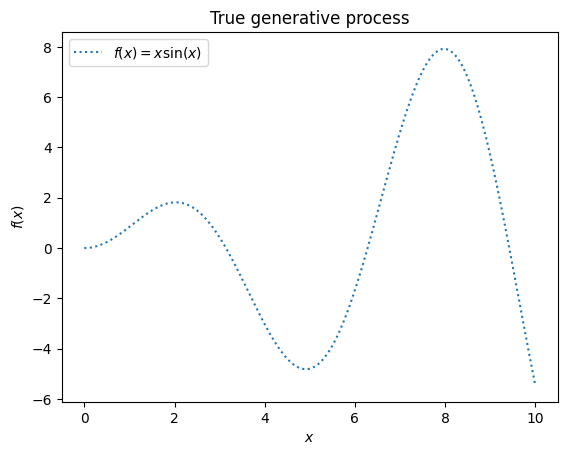

e:\dream\miniconda3\envs\ds\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


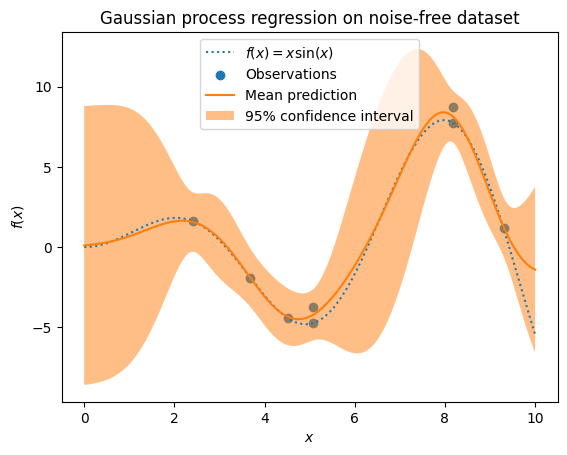

In [7]:
# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

import numpy as np

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")
plt.show()

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
X_train = np.concatenate([X_train, X_train[:2]], axis=0)
y_train = np.concatenate([y_train, y_train[:2]+1])

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel = 1 * RBF(length_scale=1, length_scale_bounds=(1e-2, 1)) + WhiteKernel(noise_level=5, noise_level_bounds=(1e-10, 1e1))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

multiply = 2
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - multiply * std_prediction,
    mean_prediction + multiply * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

## Conformal prediction (4.8)

Conformal Prediction (CP) is a distribution-free method for constructing prediction sets with guaranteed coverage (prediction set).

Regression: The prediction set is an interval. For example, instead of predicting a house price of $500,000, the prediction interval might be [$480,000, $520,000].

![cp_re.png](images_uq/cp_re.png)

Classification: The prediction set contains a subset of the possible classes. For example, instead of predicting "cat," the prediction set might be {cat, dog}.

![cp_class.png](images_uq/cp_class.png)

img ref: 
- https://mindfulmodeler.substack.com/p/week-1-getting-started-with-conformal
- https://mindfulmodeler.substack.com/p/week-3-conformal-prediction-for-regression

**Core Principles**

https://mapie.readthedocs.io/en/latest/quick_start.html

Nonconformity Measure: CP uses a nonconformity measure (also called a score function) to quantify how "strange" or "unusual" a new data point is relative to the training data.
Exchangeability: CP relies on the assumption of exchangeability, which means that the order of the data points does not affect their joint distribution.
Prediction Sets: CP produces prediction sets that are guaranteed to contain the true output with a user-specified confidence level (e.g., 95%).
Procedure

- Split the Data: Divide the training data into a proper training set and a calibration set.
- Train the Model: Train a model (any model, e.g., a neural network, random forest, or even a GP) on the proper training set.
- ***Calculate Nonconformity Scores*** **: For each point in the calibration set, calculate a nonconformity score based on the model's prediction and the true output.

![cp_lac.png](images_uq/cp_lac.png)

- Determine Quantile: Find the quantile of the nonconformity scores corresponding to the desired confidence level.
- Construct Prediction Set: For a new test point, calculate the nonconformity score for each possible output value. The prediction set consists of all output values whose nonconformity score is less than or equal to the quantile.

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
# Example Usage (with dummy data)
from sklearn.datasets import make_classification

random_state = 42

X, y = make_classification(n_samples=200, n_classes=4, random_state=42, n_informative = 15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Split the Data
X_proper_train, X_cal, y_proper_train, y_cal = train_test_split(
    X_train, y_train, test_size=0.3, random_state=random_state
)

# 2. Train the Model
model = RandomForestClassifier(random_state=42)  # Or any other classifier
model.fit(X_proper_train, y_proper_train)

# 3. Calculate Nonconformity Scores (Calibration Set)
y_cal_proba = model.predict_proba(X_cal)
scores = 1 - y_cal_proba[np.arange(len(y_cal)), y_cal]

# 4. Determine Quantile
n = len(y_cal)
quantile_index = np.quantile(scores, 0.95) 

# 5. Construct Prediction Sets
prediction_sets_bool = (1 - model.predict_proba(X_test) <= quantile_index) 
prediction_sets = np.repeat(np.array([[1, 2, 3, 4]]), len(X_test), axis=0) * prediction_sets_bool


print("Example Prediction Sets:")
for i in range(min(5,len(prediction_sets))):  # Show first few prediction sets
    print(f"  Instance {i}: {prediction_sets[i]}")





Example Prediction Sets:
  Instance 0: [1 2 3 0]
  Instance 1: [0 0 3 4]
  Instance 2: [1 0 3 4]
  Instance 3: [1 2 3 4]
  Instance 4: [0 0 3 4]


https://mapie.readthedocs.io/en/latest/quick_start.html

# Uncertainty evaluation

1. Calibration
2. Scoring function
3. Misclassification
4. Interval evaluations


## Calibration

Calibration measures how well the predicted probabilities match the actual observed outcomes, indicating the accuracy of predictive uncertainty.

- A well-calibrated model produces probabilities that reflect true likelihoods. For example, if a model predicts a probability of 0.7 for a positive outcome, that outcome should occur approximately 70% of the time.
- Calibration helps assess the reliability of predictions, particularly useful in high-stakes applications where understanding prediction confidence is crucial.


### Evaluating calibration

### Qualitative

![](images_uq/cal.png)

Guo C, Pleiss G, Sun Y, Weinberger KQ. On Calibration of Modern Neural Networks 2017.


- Left is well-calibrated model
- Right is less well-calibrated model compare to the left



We defined the perfect calibration as:

$$P(\hat{Y}=Y | \hat{P}=p) = p$$

- $\hat{Y}$ is prediction class
- $Y$ is real class
- $\hat{P}$ is prediction probability
- $p$ is the prediction accuracy

$$P(\hat{Y}=1 | \hat{P}=0.8) = 0.8$$

This means that when the model predicts an instance as class 1 with an 80% confidence, it should be correct approximately 80% of the time. Calibration ensures that the model’s confidence aligns with real-world outcomes.

### Expected calibration error (ECE)

- ECE quantifies how far a model’s predicted probabilities are from perfect calibration.
- ECE groups predictions into intervals (e.g., 0.1 to 0.2, 0.2 to 0.3, etc.), calculates the accuracy in each interval, and computes the average difference between accuracy and predicted probability.

You have a set of all prediction $(\hat{y}_j, \hat{p}_j)$. We can calculate ECE as:

1. Group the predictions into M bins (typically M = 10) based on the confidences estimates. Define bin $B_m$ to be the set of all predictions $(\hat{y}_i, \hat{p}_i)$ for which it holds that

![](images_uq/cal_ece.png)

2. Compute the accuracy and confidence of each bin $B_m$

$$\text{acc}(B_m) = \frac{1}{|B_m|} \sum_{i \in B_m} \mathcal{1}(\hat{y_i}=y_i)$$
$$\text{conf}(B_m) = \frac{1}{|B_m|} \sum_{i \in B_m} \hat{p}_i$$

3. Compute the ECE by taking the mean over the bins weighted by the number of samples in them.

$$\text{ECE} = \frac{|B_m|}{n} \sum_{m=1}^M |\text{acc}(B_m) - \text{conf}(B_m)|$$

for $n$ is the number of all sample in the set

The ECE measures the deviation of the model’s confidence predictions from the corresponding actual accuracies on a test set. It is a weighted average of bin-wise miscalibration.

![](images_uq/ece.png)

#### On Calibration of Modern Neural Networks

Modern neural networks frequently demonstrate poor calibration compared to their predecessors. Large models with minimal regularization often struggle to generalize effectively. While many studies show that deep learning can achieve good generalization by measuring discrimination performance. This suggests that high-capacity models are not immune to overfitting; instead, overfitting tends to manifest as probabilistic error rather than as straightforward classification error.

![](images_uq/dl_cal.png)

Guo C, Pleiss G, Sun Y, Weinberger KQ. On Calibration of Modern Neural Networks 2017.


## Scoring functions

### Brier score

$$BS = \frac{1}{N}\sum_{n=1}^N (\hat{p} - y)$$

- $\hat{p}$ is predicted probability
- $y$ is the true class
- Lower Brier Score indicates better calibration and accuracy of the uncertainty estimates.

> Brier score is a measure of **BOTH** **calibration** and **accuracy**

### Negative Log-Likelihood (NLL)

$$\text{NLL} = -\frac{1}{N} \sum_{n=1}^N y_n\log( p(y_n)  + (1-y_n)\log(1- p(y_n) )$$

- $\hat{p}$ is predicted probability
- $y$ is the true class
- Lower NLL indicates better calibration and accuracy of the uncertainty estimates.

> NLL is a measure of **BOTH** **calibration** and **accuracy**

## Misclassification

In the binary classification setting, an uncertainty threshold is employed to differentiate between positive (i.e., certain) and negative (i.e., uncertain) samples. The outcomes of this classification are then compared against the true labels of each sample, which can be categorized as either correct or incorrect. From this perspective, a confusion matrix can be constructed, distinguishing four possible cases with the following counts:

- True Positive (TP): The prediction is uncertain, and the expected label and the prediction differ
- False Negative (FP): The prediction is certain, but the expected label and the prediction differ
- True Negative (TN): The prediction is certain, and the expected label and the prediction are identical
- False Negative (FN): The prediction is uncertain, but the prediction and the expected label are identical

![](images_uq/misclass.png)

For 

- $L_i = \mathcal{1} (\hat{y} = y)$
- $c(x)$ is certainty estimate

$$
\begin{align}
c(x) &= p(x) \ \text{if} \ p(x) > 0.5 \\
c(x) &= 1-p(x) \ \text{if} \ p(x) \le 0.5
\end{align}
$$

![](images_uq/misclass2.png) ![](images_uq/misclass3.png)

Since the optimal threshold is often unknown, we can evaluate performance using the area under the curve (AUC), which assesses all possible thresholds.

- The Area Under the Curve (AUC), whether for the Receiver Operating Characteristic (ROC) or Precision-Recall (PR) curves, serves as a comprehensive summary metric for model performance across varying thresholds.

### Out-of-Distribution (OOD) and Corruption Detection

This methodology can also be applied to out-of-distribution (OOD) detection, where we assume that OOD data is characterized by high uncertainty. In this context, positive samples are defined as OOD, while negative samples are classified as in-distribution (ID). By leveraging uncertainty estimates, we can effectively identify samples that deviate from the expected distribution, thereby enhancing the robustness of the classification model in real-world scenarios. This approach not only improves the model's reliability but also aids in mitigating the risks associated with misclassifying OOD data.

## Interval evaluations

### Coverage probability

$$P(y_l< y < y_u)$$

- Coverage Probability measures the proportion of prediction intervals that successfully contain the true label y.
- A higher coverage probability indicates a more reliable UQ method, as it suggests that the intervals are accurately capturing the true values.

### Interval Width

Interval Width w is calculated as: $w=y_u​−y_l​$

- A narrower interval indicates more precise predictions, while a wider interval suggests greater uncertainty.
- Balance between interval width and coverage probability is crucial.

### Classification

e:\dream\miniconda3\envs\ds\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Using cpu device
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5974       0.8083        0.5292  0.0386
      2        0.4845       0.8250        0.4606  0.0093
      3        0.4261       0.8167        0.4275  0.0092
      4        0.3950       0.8167        0.4211  0.0093
      5        0.3841       0.8167        0.4270  0.0112
      6        0.3823       0.8167        0.4317  0.0103
      7        0.3815       0.8167        0.4314  0.0091
      8        0.3795       0.8167        0.4278  0.0112
      9        0.3766       0.8167        0.4227  0.0113
     10        0.3732       0.8167        0.4179  0.0106
     11        0.3699       0.8167        0.4138  0.0091
     12        0.3674       0.8167        0.4108  0.0112
     13        0.3656       0.8167        0.4080  0.0101
     14        0.3638       0.8167        0.4055  0.0102
     15        0.3620       0.8167        0.4038  0.0112
     16       

C:\Users\dream\AppData\Local\Temp\ipykernel_12308\589273018.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device) # Convert to tensors here
C:\Users\dream\AppData\Local\Temp\ipykernel_12308\589273018.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val = torch.tensor(y_val, dtype=torch.long).to(device)
C:\Users\dream\AppData\Local\Temp\ipykernel_12308\589273018.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32).to(device)  # Convert

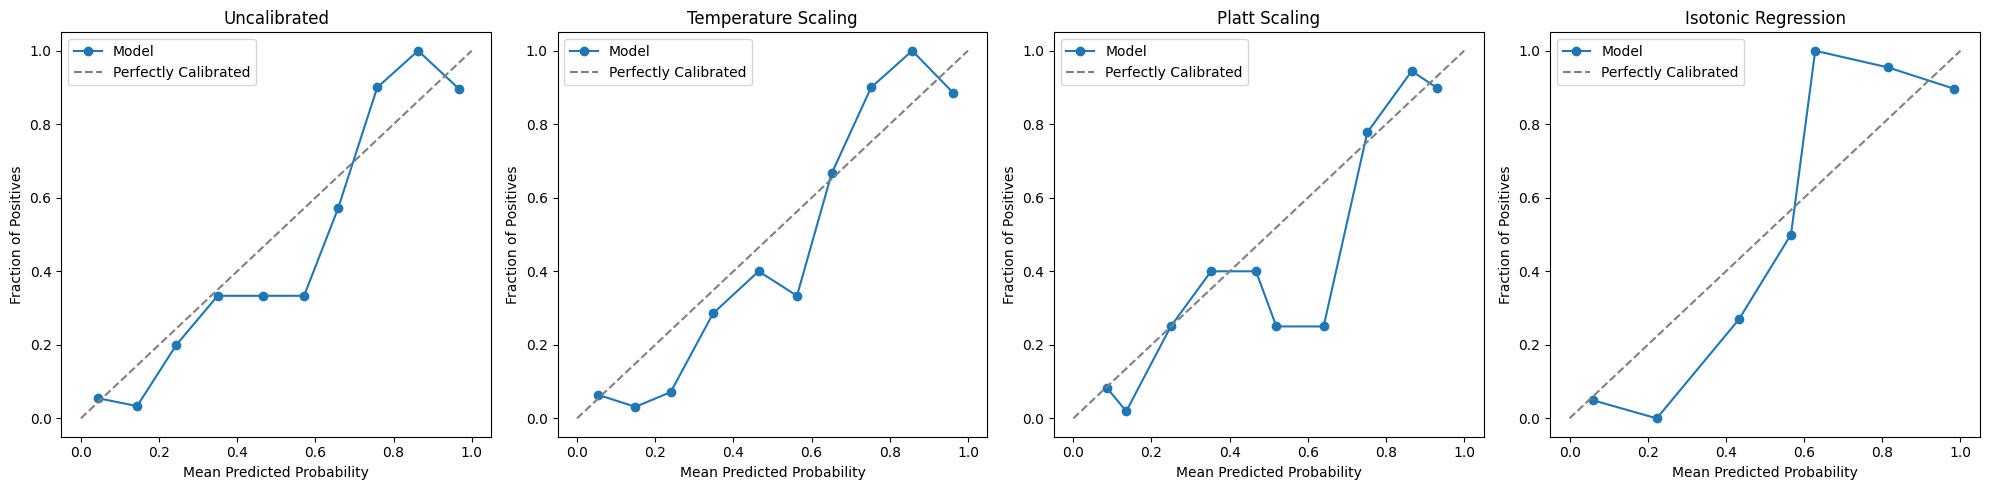

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin  # Import for creating a wrapper
from skorch import NeuralNetClassifier  # Import skorch's NeuralNetClassifier


# --- Toy Data Generation (Classification) ---
def generate_classification_data(n_samples=1000, n_features=2, n_classes=2, random_state=None):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,  # Number of informative features
        n_redundant=0,  # Number of redundant features
        n_classes=n_classes,
        random_state=random_state,
        flip_y=0.1,  # Add some label noise (aleatoric uncertainty)
        class_sep=1.0  # Separation between classes
    )
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

# --- Model Definition (Classification) ---
class ClassificationModel(nn.Module):
    def __init__(self, input_dim, n_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, 20)
        self.linear2 = nn.Linear(20, n_classes)  # Output logits for each class

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)  # No softmax here; CrossEntropyLoss applies it internally
        return x


# --- Training Loop (Now handled by Skorch) ---  No need for a separate training loop

# --- Calibration: Temperature Scaling ---
def calibrate_temperature(model, X_val, y_val, device="cpu"):
    """
    Finds the optimal temperature for temperature scaling (classification).
    """
    model.to(device)
    X_val = torch.tensor(X_val, dtype=torch.float32).to(device) # Convert to tensors here
    y_val = torch.tensor(y_val, dtype=torch.long).to(device)
    logits = []
    true_labels = []

    with torch.no_grad():
        for i in range(len(X_val)):
            output = model(X_val[i].unsqueeze(0))
            logits.append(output)
            true_labels.append(y_val[i].item())

    logits = torch.cat(logits)
    true_labels = torch.tensor(true_labels, dtype=torch.long, device=device)

    # Use CrossEntropyLoss to find the best temperature
    best_t = 1.0
    best_loss = float('inf')

    for t in np.linspace(0.1, 5, 100):  # Search over a range of temperatures
        scaled_logits = logits / t
        loss = nn.CrossEntropyLoss()(scaled_logits, true_labels)
        if loss < best_loss:
            best_loss = loss
            best_t = t

    print(f"Best Temperature: {best_t}")
    return best_t

def apply_temperature_scaling(model, X, temperature, device="cpu"):
    """Applies temperature scaling to the model's output (classification)."""
    model.to(device)
    X = torch.tensor(X, dtype=torch.float32).to(device)  # Convert X to a tensor
    with torch.no_grad():
        logits = model(X)
        scaled_logits = logits / temperature
        probs = torch.softmax(scaled_logits, dim=1)  # Apply softmax to get probabilities
    return probs.cpu().numpy() # Convert back to numpy for plotting


# --- Example Usage ---

# --- Device Configuration ---
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 1. Generate Data
n_classes = 2
X, y = generate_classification_data(n_samples=1000, n_features=2, n_classes=n_classes, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# 2. Train Model using Skorch
model = ClassificationModel(input_dim=X.shape[1], n_classes=n_classes)


net = NeuralNetClassifier(
    model,
    max_epochs=100,
    lr=0.01,
    criterion=nn.CrossEntropyLoss,  # Specify the loss function
    optimizer=optim.Adam,
    device=device,  # Pass the device to Skorch
    # Add more Skorch parameters as needed (e.g., batch_size, callbacks)
)

# Fit the Skorch model (handles training loop, device management, etc.)
net.fit(X_train, y_train)

# 3. Predict and Evaluate (Before Calibration)
probs_test = net.predict_proba(X_test)  # Skorch returns NumPy arrays
predicted_labels = np.argmax(probs_test, axis=1)
accuracy = (predicted_labels == y_test.numpy()).mean()
print(f"Accuracy (Before Calibration): {accuracy:.4f}")

# --- Calibration ---

# 4.1 Temperature Scaling
# Get the underlying PyTorch model from Skorch for temperature calibration
torch_model = net.module_
temperature = calibrate_temperature(torch_model, X_val, y_val, device=device)
probs_test_calibrated_temp = apply_temperature_scaling(torch_model, X_test, temperature, device=device)


# 4.2 Platt Scaling (using scikit-learn)
# Skorch models are already scikit-learn compatible, no wrapper needed
calibrator_platt = CalibratedClassifierCV(net, method='sigmoid', cv='prefit')
calibrator_platt.fit(X_val, y_val)  # Fit on the validation set
probs_test_calibrated_platt = calibrator_platt.predict_proba(X_test)  # Predict

# 4.3 Isotonic Regression (using scikit-learn)
calibrator_iso = CalibratedClassifierCV(net, method='isotonic', cv='prefit')
calibrator_iso.fit(X_val, y_val)  # Fit on the validation set
probs_test_calibrated_iso = calibrator_iso.predict_proba(X_test)


# --- Plotting Calibration Curves ---

def plot_calibration_curve(probs, y_true, title, ax):
    prob_true, prob_pred = calibration_curve(y_true, probs, n_bins=10, strategy='uniform')

    ax.plot(prob_pred, prob_true, marker='o', label='Model')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    ax.set_title(title)
    ax.set_xlabel('Mean Predicted Probability')
    ax.set_ylabel('Fraction of Positives')
    ax.legend()



fig, axes = plt.subplots(1, 4, figsize=(20, 5))

plot_calibration_curve(probs_test[:, 1], y_test.numpy(), "Uncalibrated", axes[0])  # Use the probability of the positive class
plot_calibration_curve(probs_test_calibrated_temp[:, 1], y_test.numpy(), "Temperature Scaling", axes[1])
plot_calibration_curve(probs_test_calibrated_platt[:, 1], y_test.numpy(), "Platt Scaling", axes[2])
plot_calibration_curve(probs_test_calibrated_iso[:, 1], y_test.numpy(), "Isotonic Regression", axes[3])

plt.tight_layout()
plt.show()




In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss, roc_auc_score, accuracy_score
from skorch import NeuralNetClassifier
import numpy as np

from mapie import metrics as mapie_metrics

# ECE: Expected Calibration Error
print("\n1. Calibration Metrics:")
print(mapie_metrics.expected_calibration_error(y_test, probs_test))
print(mapie_metrics.expected_calibration_error(y_test, probs_test_calibrated_platt))


1. Calibration Metrics:
0.4404812303185463
0.4293856477364898


In [29]:
# 2. Scoring Functions
probs_test_max = np.max(probs_test, axis=1)
print("\n2. Scoring Functions:")
print(f"Brier Score (Uncalibrated): {brier_score_loss(y_test, probs_test_max):.4f}")
print(f"NLL (Uncalibrated): {-np.mean(np.log(probs_test_max)):.4f}")

probs_test_calibrated_max = np.max(probs_test_calibrated_platt, axis=1)
print(f"Brier Score (Platt Scaling): {brier_score_loss(y_test, probs_test_calibrated_max):.4f}")
print(f"NLL (Platt Scaling): {-np.mean(np.log(probs_test_calibrated_max)):.4f}")



2. Scoring Functions:
Brier Score (Uncalibrated): 0.4383
NLL (Uncalibrated): 0.1473
Brier Score (Platt Scaling): 0.4138
NLL (Platt Scaling): 0.1612


In [35]:
print("\n3. misclassification")
pred = np.argmax(probs_test, axis=1)
probs_test_max = np.max(probs_test, axis=1)
correct = pred == y_test.numpy()
certainty_score = probs_test_max

print(f"AUC (Uncalibrated): {roc_auc_score(correct, certainty_score):.4f}")

pred = np.argmax(probs_test_calibrated_platt, axis=1)
probs_test_calibrated_max = np.max(probs_test_calibrated_platt, axis=1)
correct = pred == y_test.numpy()
certainty_score = probs_test_calibrated_max

print(f"AUC (Platt Scaling): {roc_auc_score(correct, certainty_score):.4f}")


3. misclassification
AUC (Uncalibrated): 0.6550
AUC (Platt Scaling): 0.6837


### Regression

Training model for quantile: 0.1
Tau: 0.1, Epoch [100/1000], Loss: 0.2503
Tau: 0.1, Epoch [200/1000], Loss: 0.2244
Tau: 0.1, Epoch [300/1000], Loss: 0.2196
Tau: 0.1, Epoch [400/1000], Loss: 0.2162
Tau: 0.1, Epoch [500/1000], Loss: 0.2156
Tau: 0.1, Epoch [600/1000], Loss: 0.2159
Tau: 0.1, Epoch [700/1000], Loss: 0.2125
Tau: 0.1, Epoch [800/1000], Loss: 0.2105
Tau: 0.1, Epoch [900/1000], Loss: 0.2091
Tau: 0.1, Epoch [1000/1000], Loss: 0.2082
Training model for quantile: 0.5
Tau: 0.5, Epoch [100/1000], Loss: 0.5120
Tau: 0.5, Epoch [200/1000], Loss: 0.5076
Tau: 0.5, Epoch [300/1000], Loss: 0.5076
Tau: 0.5, Epoch [400/1000], Loss: 0.5075
Tau: 0.5, Epoch [500/1000], Loss: 0.5067
Tau: 0.5, Epoch [600/1000], Loss: 0.5072
Tau: 0.5, Epoch [700/1000], Loss: 0.5057
Tau: 0.5, Epoch [800/1000], Loss: 0.5049
Tau: 0.5, Epoch [900/1000], Loss: 0.5055
Tau: 0.5, Epoch [1000/1000], Loss: 0.5048
Training model for quantile: 0.9
Tau: 0.9, Epoch [100/1000], Loss: 0.2793
Tau: 0.9, Epoch [200/1000], Loss: 0.24

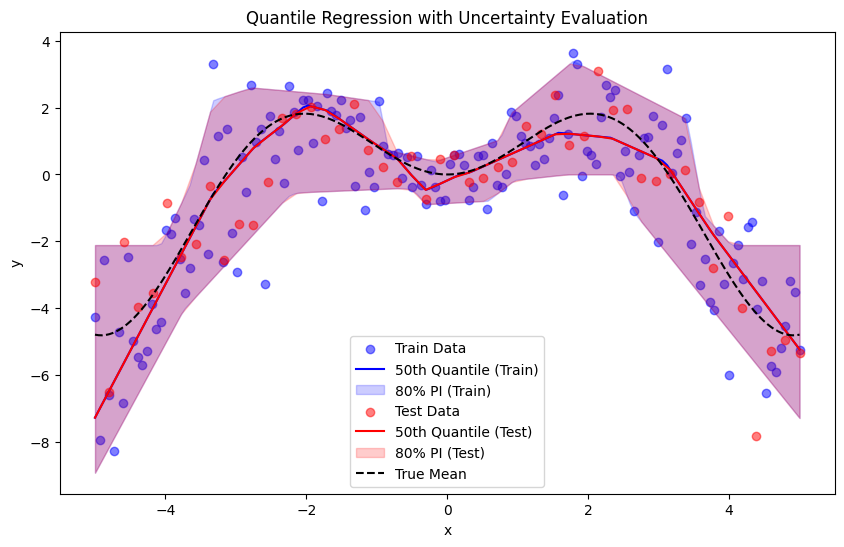

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Toy Data ---
num_samples_train = 150
num_samples_test = 50  # Separate variable for test set size
X_train = torch.linspace(-5, 5, num_samples_train).reshape(-1, 1)
true_mean_train = X_train * torch.sin(X_train)
true_std_train = 0.5 + torch.abs(X_train) * 0.3
y_train = true_mean_train + torch.randn(num_samples_train, 1) * true_std_train

# Create test data
X_test = torch.linspace(-5, 5, num_samples_test).reshape(-1, 1) # Same range as X_train
true_mean_test = X_test * torch.sin(X_test) # Calculate true mean for X_test
true_std_test = 0.5 + torch.abs(X_test) * 0.3  # Calculate true std for X_test
y_test = true_mean_test + torch.randn(num_samples_test, 1) * true_std_test # Use true_std_test



# --- Model (Predicts a single quantile) ---
class SingleQuantileRegressionNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        quantile = self.fc_out(x)
        return quantile

# --- Quantile Loss (Pinball Loss) ---
def single_quantile_loss(y_true, y_pred, tau):
    error = y_true - y_pred
    loss = torch.where(error >= 0, tau * error, (tau - 1) * error)
    return torch.mean(loss)

# --- Training Function ---
def train_quantile_model(X, y, tau, num_epochs=1000, lr=0.01, hidden_dim=20):
    model = SingleQuantileRegressionNN(input_dim=X.shape[1], hidden_dim=hidden_dim)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        y_pred = model(X)
        loss = single_quantile_loss(y, y_pred, tau)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Tau: {tau}, Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model

# --- Define Quantiles and Train Models ---
quantiles = [0.1, 0.5, 0.9]
models = {}
for tau in quantiles:
    print(f"Training model for quantile: {tau}")
    models[tau] = train_quantile_model(X_train, y_train, tau)  # Use training data

# --- Prediction ---
with torch.no_grad():
    predicted_quantiles_train = {}
    for tau, model in models.items():
        predicted_quantiles_train[tau] = model(X_train)
    predicted_quantiles_test = {}  # Predictions on test set
    for tau, model in models.items():
        predicted_quantiles_test[tau] = model(X_test)

# --- Uncertainty Evaluation ---

def prediction_interval_coverage_probability(y_true, lower_bound, upper_bound):
    """Calculates the Prediction Interval Coverage Probability (PICP)."""
    coverage = ((y_true >= lower_bound) & (y_true <= upper_bound)).float().mean()
    return coverage.item()

def mean_prediction_interval_width(lower_bound, upper_bound):
    """Calculates the Mean Prediction Interval Width (MPIW)."""
    width = upper_bound - lower_bound
    return torch.mean(width).item()

# 1. Prediction Interval Coverage Probability (PICP)
lower_quantile = 0.1
upper_quantile = 0.9

lower_bound_train = predicted_quantiles_train[lower_quantile]
upper_bound_train = predicted_quantiles_train[upper_quantile]
picp_train = prediction_interval_coverage_probability(y_train, lower_bound_train, upper_bound_train)
print(f"PICP (Train): {picp_train:.4f}")


lower_bound_test = predicted_quantiles_test[lower_quantile]
upper_bound_test = predicted_quantiles_test[upper_quantile]
picp_test = prediction_interval_coverage_probability(y_test, lower_bound_test, upper_bound_test)
print(f"PICP (Test): {picp_test:.4f}")


# 2. Mean Prediction Interval Width (MPIW)
mpiw_train = mean_prediction_interval_width(lower_bound_train, upper_bound_train)
print(f"MPIW (Train): {mpiw_train:.4f}")

mpiw_test = mean_prediction_interval_width(lower_bound_test, upper_bound_test)
print(f"MPIW (Test): {mpiw_test:.4f}")

# 3. Other Standard Regression Metrics (on the median prediction)
y_pred_median_train = predicted_quantiles_train[0.5].numpy().flatten()
y_true_train = y_train.numpy().flatten()


# --- Visualization ---
plt.figure(figsize=(10, 6))

# Plot training data and predictions
plt.scatter(X_train.numpy(), y_train.numpy(), label='Train Data', alpha=0.5, color='blue')
plt.plot(X_train.numpy(), predicted_quantiles_train[0.5].numpy(), label=f'50th Quantile (Train)', linestyle='-', color='blue')
plt.fill_between(X_train.numpy().flatten(),
                predicted_quantiles_train[0.1].numpy().flatten(),
                predicted_quantiles_train[0.9].numpy().flatten(),
                color='blue', alpha=0.2, label='80% PI (Train)')

# Plot test data and predictions
plt.scatter(X_test.numpy(), y_test.numpy(), label='Test Data', alpha=0.5, color='red')
plt.plot(X_test.numpy(), predicted_quantiles_test[0.5].numpy(), label=f'50th Quantile (Test)', linestyle='-', color='red')
plt.fill_between(X_test.numpy().flatten(),
                predicted_quantiles_test[0.1].numpy().flatten(),
                predicted_quantiles_test[0.9].numpy().flatten(),
                color='red', alpha=0.2, label='80% PI (Test)')


plt.plot(X.numpy(), true_mean.numpy(), label='True Mean', color='black', linestyle='--')  # Plot true mean
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quantile Regression with Uncertainty Evaluation')
plt.show()

# Application in Medicine

![](images_uq/app.png)

Zhang X, Sisniega A, Zbijewski WB, Lee J, Jones CK, Wu P, et al. Combining physics‐based models with deep learning image synthesis and uncertainty in intraoperative cone‐beam CT of the brain. Medical Physics 2023;50:2607–24.


![](images_uq/ex.png)

Pereira T, Cardoso S, Guerreiro M, Mendonça A, Madeira SC. Targeting the uncertainty of predictions at patient-level using an ensemble of classifiers coupled with calibration methods, Venn-ABERS, and Conformal Predictors: A case study in AD. Journal of Biomedical Informatics 2020;101:103350.

